In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = np.loadtxt("galaxies_train.csv", delimiter=",", skiprows=1)
test_data = np.loadtxt("galaxies_test.csv", delimiter=",", skiprows=1)

X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])
print("shape of X_train:", X_train.shape)
print("shape of t_train:", t_train.shape)

Number of training instances: 500
Number of test instances: 500
Number of attributes: 10
shape of X_train: (500, 10)
shape of t_train: (500,)


In [3]:
# NOTE: You are supposed to use this strucuture, i.e., 
# the pre-defined functions and variables. If you 
# have difficulties to keep this structure, you ARE 
# ALLOWED to adapt/change the code structure slightly!
# You might also want to add additional functions or
# variables.

class NearestNeighborRegressor:
    
    def __init__(self, n_neighbors=1, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """
        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix
    
    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t
    
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of length n_samples
        """         
        
        if self.dist_measure == "euclidean":
            predictions = self.eucPredict(X)
        elif self.dist_measure == "other":
            predictions = self.otherPredict(X)

        return predictions
    
    def eucPredict(self, X):
        predictions = []
        for x in range(len(X)):
            distances = []
            for q in range(X_train.shape[0]): 
                    dist = self.euclidean_distance(X[x], self.X_train[q])
                    distances.append(dist)
            distances = np.argsort(distances)#get the indices of how distances would be sorted
            predictions.append(np.mean(self.t_train[distances[:self.n_neighbors]]))
        return np.array(predictions)

    def otherPredict(self, X):
        predictions = []
        for x in range(len(X)):
            distances = []
            for q in range(X_train.shape[0]): 
                    dist = self.other_distance(X[x], self.X_train[q])
                    distances.append(dist)
            distances = np.argsort(distances)#get the indices of how distances would be sorted
            predictions.append(np.mean(self.t_train[distances[:self.n_neighbors]]))
        return np.array(predictions)

    def euclidean_distance(self, p, q):
        return np.sqrt(np.sum((p-q)**2))
    
    def other_distance(self, p, q):
        distance = np.dot((p-q).T, self.dist_matrix)#distance = np.dot((p-q).reshape((1,10)), self.dist_matrix)
        distance = np.dot(distance, (p-q))
        return distance
        

    def RMSE(self, t, tp): #Assignment A2 EX1
        error = t - tp
        square = error ** 2
        mean = np.mean(square)
        root = np.sqrt(mean)       
        return root


###Task a

The rmse-value is: 0.8243064553494784


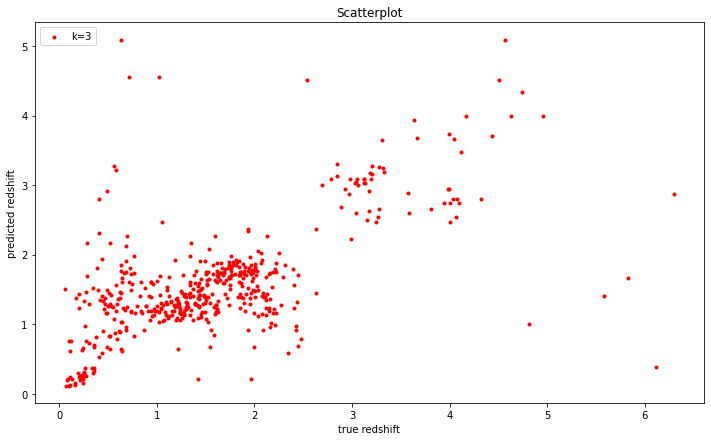

In [4]:
eucModel = NearestNeighborRegressor(n_neighbors=3, dist_measure="euclidean")
eucModel.fit(X_train, t_train)

predictions = eucModel.predict(X_test)
rmseValue = eucModel.RMSE(t_test, predictions)
print("The rmse-value is:", rmseValue)
plt.figure(figsize=(12,7))
plt.title("Scatterplot")
plt.xlabel('true redshift')
plt.ylabel('predicted redshift')
plt.scatter(t_test, predictions, color='red', label="k=3", marker=".")
plt.legend(loc=2)
plt.savefig("plot4a.png")
plt.show()

###Task b

The rmse-value is: 1.0997971796682453


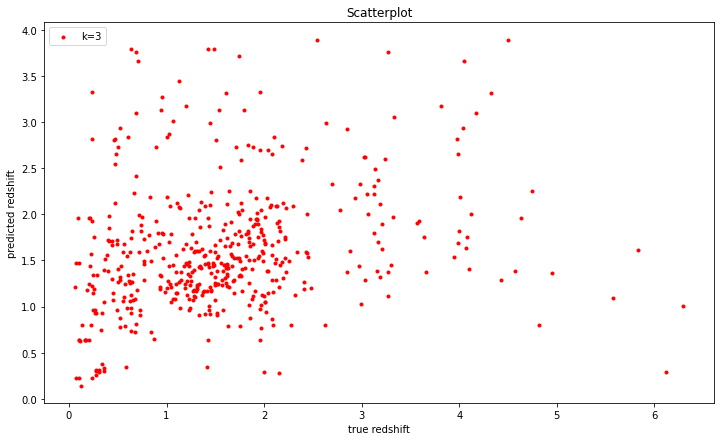

In [5]:
M = np.diag(np.array([0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,1.0,1.0]))

otherModel = NearestNeighborRegressor(n_neighbors=3, dist_measure="other", dist_matrix=M)
otherModel.fit(X_train, t_train)

predictions = otherModel.predict(X_test)

rmseValue = otherModel.RMSE(t_test, predictions)
print("The rmse-value is:", rmseValue)

plt.figure(figsize=(12,7))
plt.title("Scatterplot")
plt.xlabel('true redshift')
plt.ylabel('predicted redshift')
plt.scatter(t_test, predictions, color='red', label="k=3", marker=".")
plt.legend(loc=2)
plt.savefig("plot4b.png")
plt.show()

#print((X_test[0] - otherModel.X_train[1]))
#print((X_test[0] - otherModel.X_train[1]).T)